# 500_RQ1_Analysis 
## Purpose 
In this notebook we read both our Fantasty and FIFA cleaned datasets and join them and performing any necessary cleaning.  
## Datasets 
* Input: FIFA18.csv,Fantasy1718.csv
* Output: Joined1718.csv

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
RQ1 = pd.read_csv('../../data/analysis/RQ1.csv')

In [3]:
RQ1 = RQ1.drop(RQ1.columns[[0]], axis=1)

In [4]:
RQ1.head(5)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form
0,Lionel Messi,Forward,FC Barcelona,Spanish Primera Division,30,Argentina,93,https://cdn.sofifa.org/18/players/158023.png,False,False,False,42.00,8.255952,32.0,7.375000
1,Cristiano Ronaldo,Forward,Real Madrid CF,Spanish Primera Division,32,Portugal,94,https://cdn.sofifa.org/18/players/20801.png,False,False,False,41.00,7.926829,25.0,7.280000
2,Luis Suarez,Forward,FC Barcelona,Spanish Primera Division,30,Uruguay,92,https://cdn.sofifa.org/18/players/176580.png,False,False,False,41.25,7.018182,28.0,6.535714
3,Zlatan Ibrahimovic,Forward,Manchester United,English Premier League,35,Sweden,88,https://cdn.sofifa.org/18/players/41236.png,False,False,False,37.50,6.900000,5.0,1.200000
4,Robert Lewandowski,Forward,FC Bayern Munich,German Bundesliga,28,Poland,91,https://cdn.sofifa.org/18/players/188545.png,False,False,False,40.00,6.050000,28.0,6.785714


In [5]:
RQ1[RQ1["fan's_favourite_trait"]==True]

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,Homegrown,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form


In [6]:
RQ1.groupby(['overall']).count()['Players']

overall
62      1
63      3
64      6
65      9
66      8
67     17
68     28
69     42
70     73
71     97
72    137
73    146
74    151
75    157
76    141
77    164
78    101
79    107
80     96
81     61
82     83
83     52
84     28
85     22
86     18
87     10
88     14
89      8
90      5
91      1
92      3
93      1
94      1
Name: Players, dtype: int64

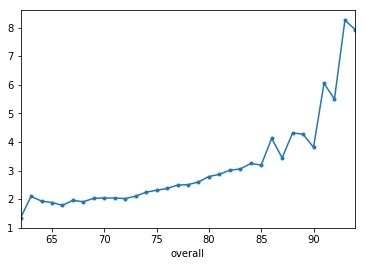

In [7]:
o = RQ1.groupby(['overall']).mean()['Previous Average Form']
o.plot(style='.-')

In [8]:
RQ1['Previous Average Form'].corr(RQ1['overall'])

0.61854072490897716

## Goalkeepers

In [9]:
RQ1_Goalkeepers = RQ1[RQ1['Position'] == 'Goalkeeper']

In [10]:
RQ1_Goalkeepers.groupby(['overall']).count()['Players']

overall
66     3
67     1
68     1
69     1
70     5
71     3
72     9
73     3
74    13
75     7
76     6
77    11
78     5
79    11
80    10
81     8
82    12
83     7
84     4
85     5
86     1
87     1
88     2
89     2
90     1
92     1
Name: Players, dtype: int64

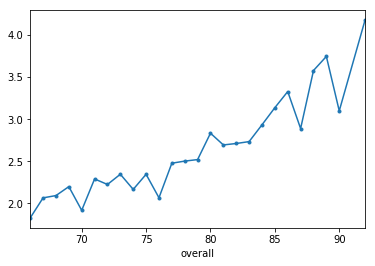

In [11]:
gk = RQ1_Goalkeepers.groupby(['overall']).mean()['Previous Average Form']
gk.plot(style='.-')

In [12]:
RQ1_Goalkeepers['Previous Average Form'].corr(RQ1_Goalkeepers['overall'])

0.68849995414859977

In [13]:
worldclass_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']>84]
average_goalkeepers = RQ1_Goalkeepers[RQ1_Goalkeepers['overall']<85]

In [14]:
x = worldclass_goalkeepers['overall'].values[:,np.newaxis]
y = worldclass_goalkeepers['Previous Average Form'].values
worldclass_goalkeepers_model = LinearRegression()
worldclass_goalkeepers_model.fit(x, y)

w = average_goalkeepers['overall'].values[:,np.newaxis]
z = average_goalkeepers['Previous Average Form'].values
average_goalkeepers_model = LinearRegression()
average_goalkeepers_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
average_goalkeepers["Distance"] = average_goalkeepers['Previous Average Form'].values - average_goalkeepers_model.predict(average_goalkeepers['overall'].values[:,np.newaxis])
worldclass_goalkeepers["Distance"] = worldclass_goalkeepers['Previous Average Form'].values - worldclass_goalkeepers_model.predict(worldclass_goalkeepers['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
pos_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']>=0]['Distance'].mean()
pos_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>=0]['Distance'].mean()

neg_dist_gk0 = average_goalkeepers[average_goalkeepers['Distance']<0]['Distance'].mean()
neg_dist_gk1 = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<0]['Distance'].mean()

In [17]:
underrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']>(pos_dist_gk0*2)]
underrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']>pos_dist_gk1]

overrated_average_gk = average_goalkeepers[average_goalkeepers['Distance']<(neg_dist_gk0*2)]
overrated_worldclass_gk = worldclass_goalkeepers[worldclass_goalkeepers['Distance']<neg_dist_gk1]

In [18]:
underrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(underrated_average_gk['overall'].values[:,np.newaxis])
underrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(underrated_worldclass_gk['overall'].values[:,np.newaxis])

overrated_average_gk['Predicted Form'] = average_goalkeepers_model.predict(overrated_average_gk['overall'].values[:,np.newaxis])
overrated_worldclass_gk['Predicted Form'] = worldclass_goalkeepers_model.predict(overrated_worldclass_gk['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [19]:
underrated_goalkeepers = pd.concat([underrated_average_gk ,underrated_worldclass_gk ],axis=0)

overrated_goalkeepers = pd.concat([overrated_average_gk ,overrated_worldclass_gk ],axis=0)

In [20]:
t1 = underrated_average_gk['overall'].values[:,np.newaxis] 
t2 = underrated_average_gk['Previous Average Form'].values 
t3 = overrated_average_gk['overall'].values[:,np.newaxis] 
t4 = overrated_average_gk['Previous Average Form'].values 
s1 = underrated_worldclass_gk['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_gk['Previous Average Form'].values 
s3 = overrated_worldclass_gk['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_gk['Previous Average Form'].values

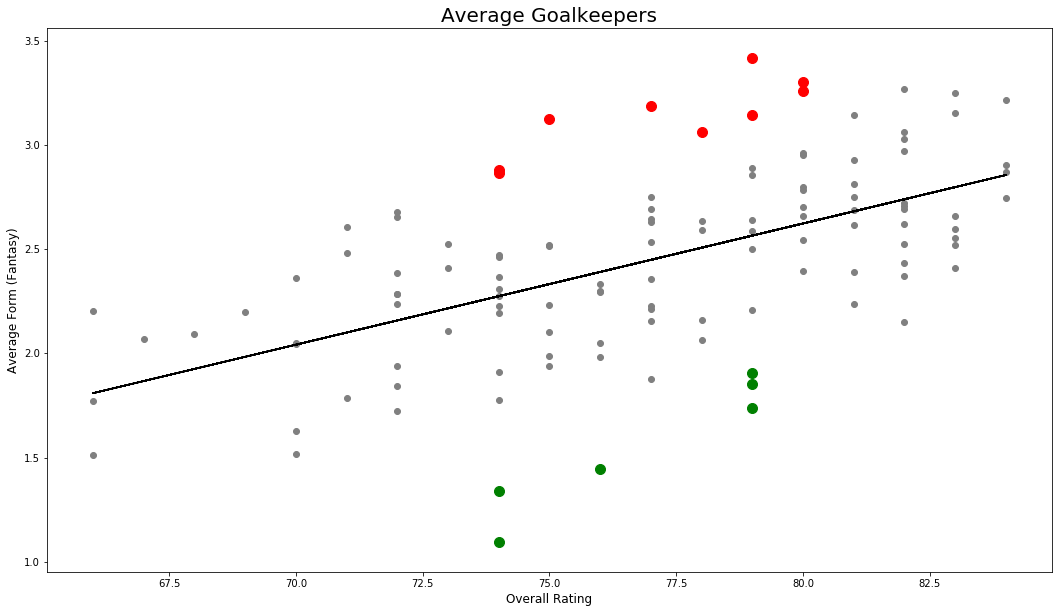

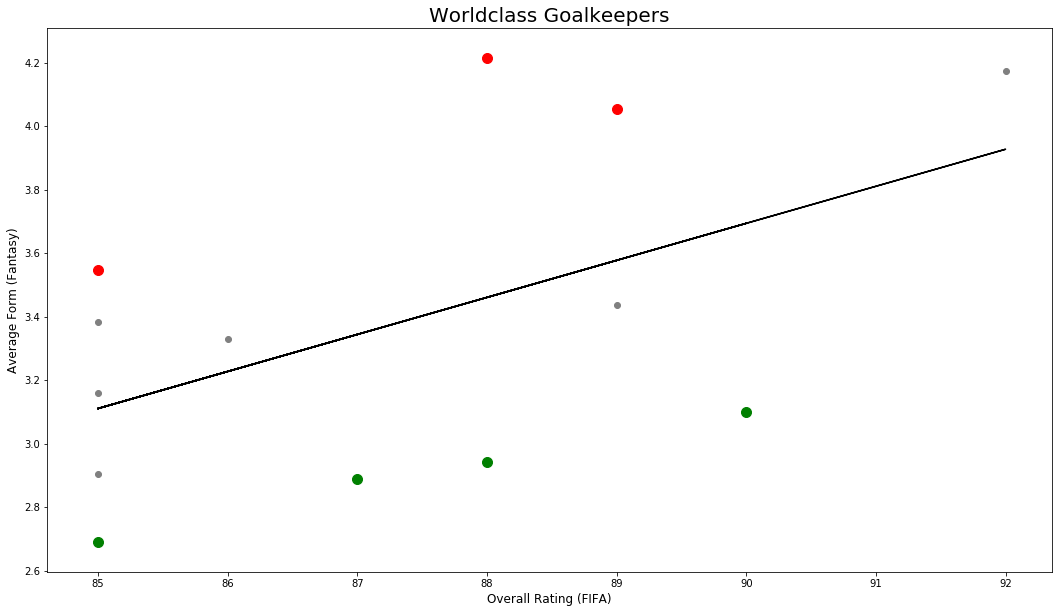

In [21]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_goalkeepers_model.predict(w),color='k') 
plt.title('Average Goalkeepers', fontsize=20)
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_goalkeepers_model.predict(x),color='k') 
plt.title('Worldclass Goalkeepers', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Defenders

In [22]:
RQ1_Defenders = RQ1[RQ1['Position'] == 'Defender']

In [23]:
RQ1_Defenders.groupby(['overall']).count()['Players']

overall
64     2
65     2
66     2
67     4
68    15
69    13
70    25
71    41
72    48
73    49
74    46
75    54
76    52
77    57
78    21
79    40
80    24
81    17
82    14
83    13
84     8
85     6
86     5
88     5
89     1
90     1
Name: Players, dtype: int64

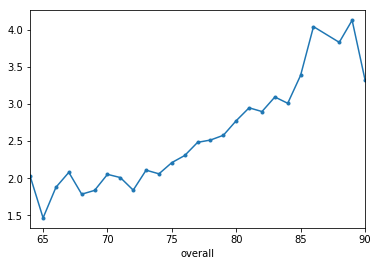

In [24]:
df = RQ1_Defenders.groupby(['overall']).mean()['Previous Average Form']
df.plot(style='.-')

In [25]:
RQ1_Defenders['Previous Average Form'].corr(RQ1_Defenders['overall'])

0.62626550414557958

In [26]:
worldclass_defenders = RQ1_Defenders[RQ1_Defenders['overall']>84]
average_defenders = RQ1_Defenders[RQ1_Defenders['overall']<85]

In [27]:
x = worldclass_defenders['overall'].values[:,np.newaxis]
y = worldclass_defenders['Previous Average Form'].values
worldclass_defenders_model = LinearRegression()
worldclass_defenders_model.fit(x, y)

w = average_defenders['overall'].values[:,np.newaxis]
z = average_defenders['Previous Average Form'].values
average_defenders_model = LinearRegression()
average_defenders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
average_defenders["Distance"] = average_defenders['Previous Average Form'].values - average_defenders_model.predict(average_defenders['overall'].values[:,np.newaxis])
worldclass_defenders["Distance"] = worldclass_defenders['Previous Average Form'].values - worldclass_defenders_model.predict(worldclass_defenders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
pos_dist_def0 = average_defenders[average_defenders['Distance']>=0]['Distance'].mean()
pos_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']>=0]['Distance'].mean()

neg_dist_def0 = average_defenders[average_defenders['Distance']<0]['Distance'].mean()
neg_dist_def1 = worldclass_defenders[worldclass_defenders['Distance']<0]['Distance'].mean()

In [30]:
underrated_average_def = average_defenders[average_defenders['Distance']>(pos_dist_def0*2)]
underrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']>pos_dist_def1]

overrated_average_def = average_defenders[average_defenders['Distance']<(neg_dist_def0*2)]
overrated_worldclass_def = worldclass_defenders[worldclass_defenders['Distance']<neg_dist_def1]

In [31]:
underrated_average_def['Predicted Form'] = average_defenders_model.predict(underrated_average_def['overall'].values[:,np.newaxis])
underrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(underrated_worldclass_def['overall'].values[:,np.newaxis])

overrated_average_def['Predicted Form'] = average_defenders_model.predict(overrated_average_def['overall'].values[:,np.newaxis])
overrated_worldclass_def['Predicted Form'] = worldclass_defenders_model.predict(overrated_worldclass_def['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [32]:
underrated_defenders = pd.concat([underrated_average_def ,underrated_worldclass_def ],axis=0)

overrated_defenders = pd.concat([overrated_average_def ,overrated_worldclass_def ],axis=0)

In [33]:
t1 = underrated_average_def['overall'].values[:,np.newaxis] 
t2 = underrated_average_def['Previous Average Form'].values 
t3 = overrated_average_def['overall'].values[:,np.newaxis] 
t4 = overrated_average_def['Previous Average Form'].values 
s1 = underrated_worldclass_def['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_def['Previous Average Form'].values 
s3 = overrated_worldclass_def['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_def['Previous Average Form'].values

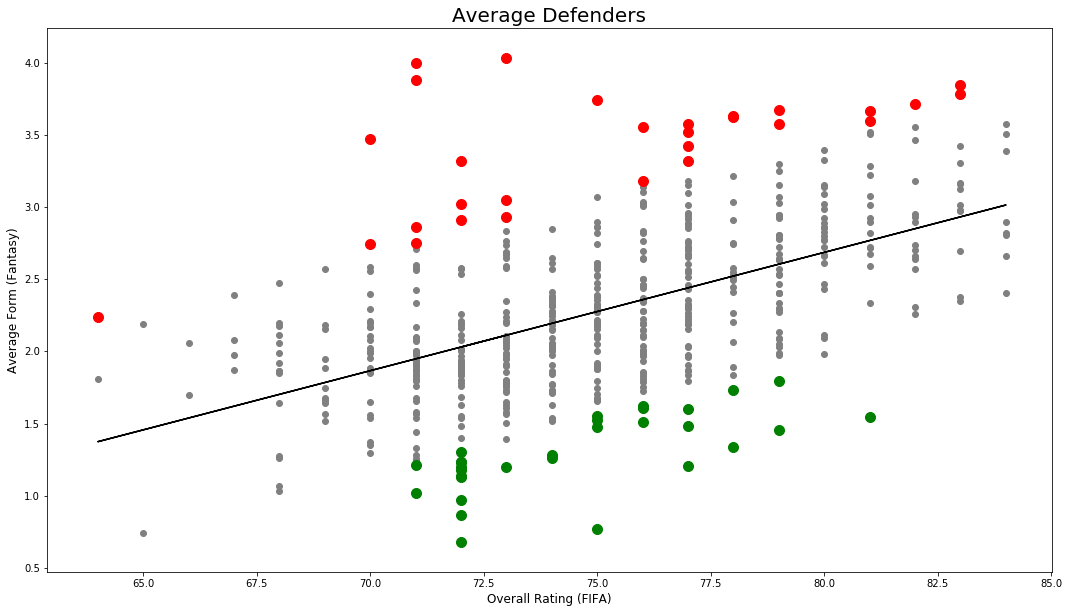

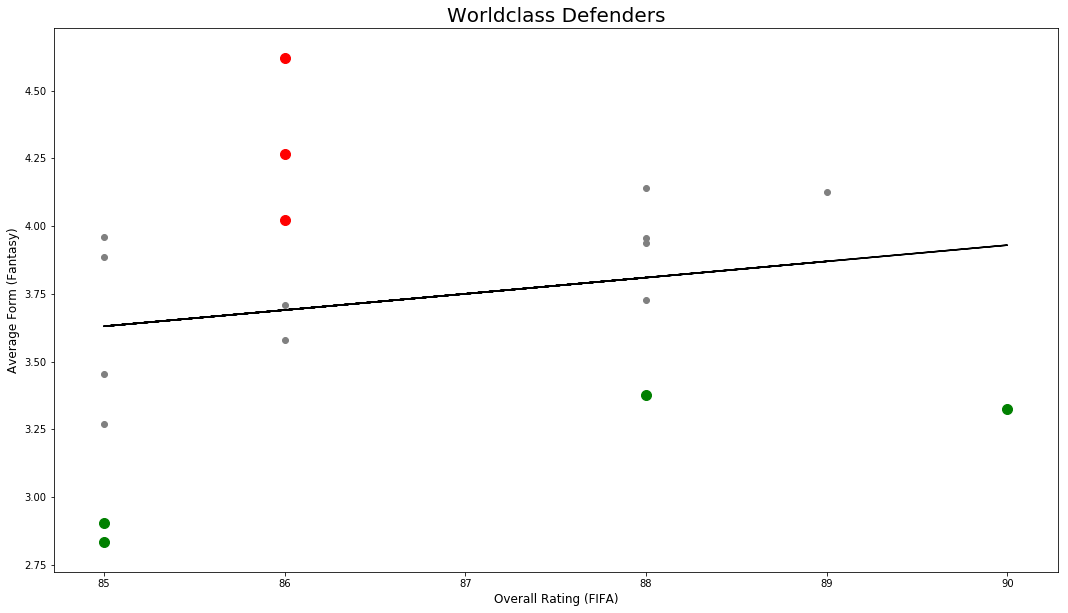

In [34]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_defenders_model.predict(w),color='k') 
plt.title('Average Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_defenders_model.predict(x),color='k') 
plt.title('Worldclass Defenders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Midfielders

In [35]:
RQ1_Midfielders = RQ1[RQ1['Position'] == 'Midfielder']

In [36]:
RQ1_Midfielders.groupby(['overall']).count()['Players']

overall
62     1
63     3
64     2
65     6
66     3
67     9
68     7
69    17
70    32
71    34
72    48
73    75
74    60
75    62
76    53
77    66
78    55
79    39
80    39
81    22
82    38
83    25
84    13
85     9
86     7
87     8
88     3
89     3
90     2
Name: Players, dtype: int64

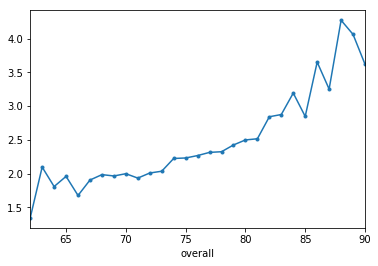

In [37]:
mid = RQ1_Midfielders.groupby(['overall']).mean()['Previous Average Form']
mid.plot(style='.-')

In [38]:
RQ1_Midfielders['Previous Average Form'].corr(RQ1_Midfielders['overall'])

0.56668684897250821

In [39]:
worldclass_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']>84]
average_midfielders = RQ1_Midfielders[RQ1_Midfielders['overall']<85]

In [40]:
x = worldclass_midfielders['overall'].values[:,np.newaxis]
y = worldclass_midfielders['Previous Average Form'].values
worldclass_midfielders_model = LinearRegression()
worldclass_midfielders_model.fit(x, y)

w = average_midfielders['overall'].values[:,np.newaxis]
z = average_midfielders['Previous Average Form'].values
average_midfielders_model = LinearRegression()
average_midfielders_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
average_midfielders["Distance"] = average_midfielders['Previous Average Form'].values - average_midfielders_model.predict(average_midfielders['overall'].values[:,np.newaxis])
worldclass_midfielders["Distance"] = worldclass_midfielders['Previous Average Form'].values - worldclass_midfielders_model.predict(worldclass_midfielders['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
pos_dist_mid0 = average_midfielders[average_midfielders['Distance']>=0]['Distance'].mean()
pos_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']>=0]['Distance'].mean()

neg_dist_mid0 = average_midfielders[average_midfielders['Distance']<0]['Distance'].mean()
neg_dist_mid1 = worldclass_midfielders[worldclass_midfielders['Distance']<0]['Distance'].mean()

In [43]:
underrated_average_mid = average_midfielders[average_midfielders['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']>pos_dist_mid1]

overrated_average_mid = average_midfielders[average_midfielders['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_mid = worldclass_midfielders[worldclass_midfielders['Distance']<neg_dist_mid1]

In [44]:
underrated_average_mid['Predicted Form'] = average_midfielders_model.predict(underrated_average_mid['overall'].values[:,np.newaxis])
underrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(underrated_worldclass_mid['overall'].values[:,np.newaxis])

overrated_average_mid['Predicted Form'] = average_midfielders_model.predict(overrated_average_mid['overall'].values[:,np.newaxis])
overrated_worldclass_mid['Predicted Form'] = worldclass_midfielders_model.predict(overrated_worldclass_mid['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [45]:
underrated_midfielders = pd.concat([underrated_average_mid ,underrated_worldclass_mid ],axis=0)

overrated_midfielders = pd.concat([overrated_average_mid ,overrated_worldclass_mid ],axis=0)

In [46]:
t1 = underrated_average_mid['overall'].values[:,np.newaxis] 
t2 = underrated_average_mid['Previous Average Form'].values 
t3 = overrated_average_mid['overall'].values[:,np.newaxis] 
t4 = overrated_average_mid['Previous Average Form'].values 
s1 = underrated_worldclass_mid['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_mid['Previous Average Form'].values 
s3 = overrated_worldclass_mid['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_mid['Previous Average Form'].values

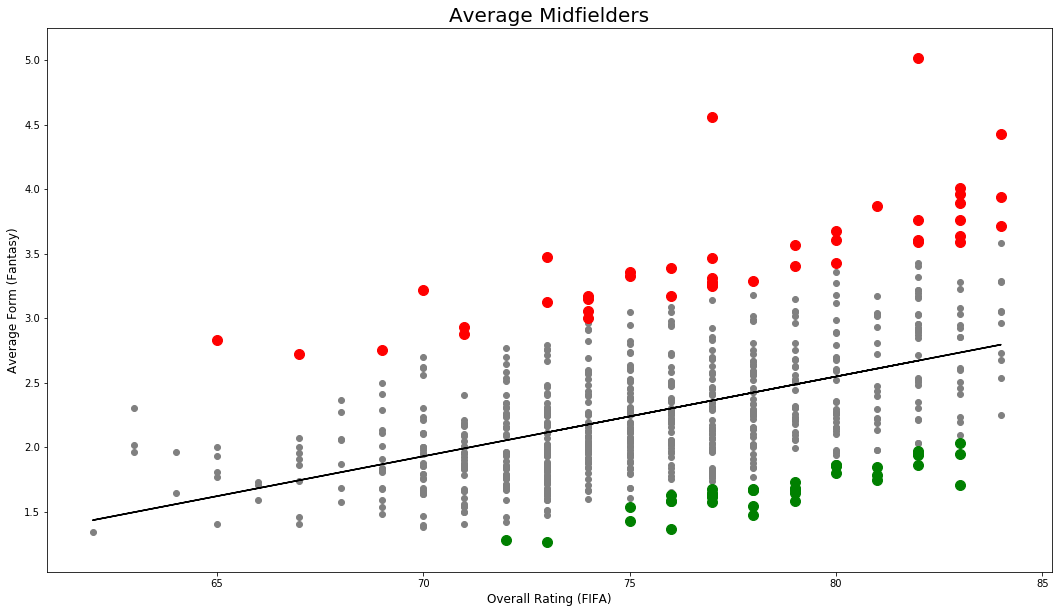

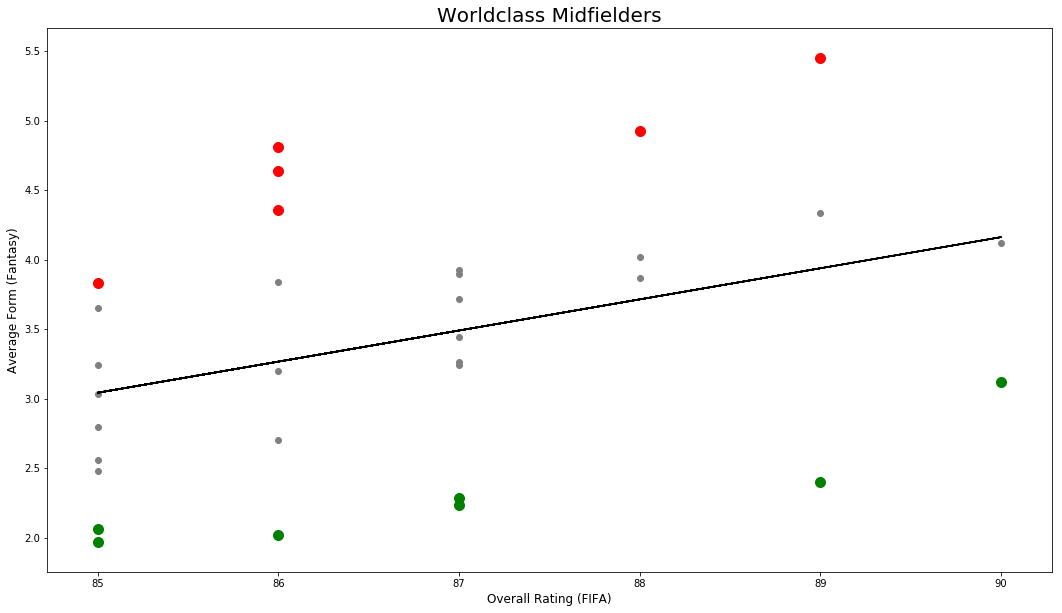

In [47]:
plt.figure(figsize=(18,10)) 
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_midfielders_model.predict(w),color='k') 
plt.title('Average Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show() 
plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_midfielders_model.predict(x),color='k') 
plt.title('Worldclass Midfielders', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.show()

## Forwards

In [48]:
RQ1_Forwards = RQ1[RQ1['Position'] == 'Forward']

In [49]:
RQ1_Forwards.groupby(['overall']).count()['Players']

overall
64     2
65     1
67     3
68     5
69    11
70    11
71    19
72    32
73    19
74    32
75    34
76    30
77    30
78    20
79    17
80    23
81    14
82    19
83     7
84     3
85     2
86     5
87     1
88     4
89     2
90     1
91     1
92     2
93     1
94     1
Name: Players, dtype: int64

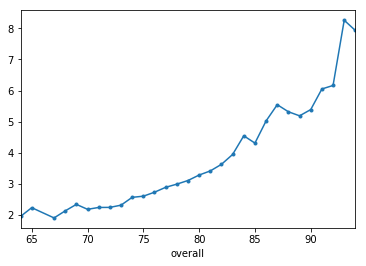

In [50]:
fwd = RQ1_Forwards.groupby(['overall']).mean()['Previous Average Form']
fwd.plot(style='.-')

In [51]:
RQ1_Forwards['Previous Average Form'].corr(RQ1_Forwards['overall'])

0.78310468353909879

In [52]:
worldclass_forwards = RQ1_Forwards[RQ1_Forwards['overall']>84]
average_forwards = RQ1_Forwards[RQ1_Forwards['overall']<85]

In [53]:
x = worldclass_forwards['overall'].values[:,np.newaxis]
y = worldclass_forwards['Previous Average Form'].values
worldclass_forwards_model = LinearRegression()
worldclass_forwards_model.fit(x, y)

w = average_forwards['overall'].values[:,np.newaxis]
z = average_forwards['Previous Average Form'].values
average_forwards_model = LinearRegression()
average_forwards_model.fit(w, z)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
average_forwards["Distance"] = average_forwards['Previous Average Form'].values - average_forwards_model.predict(average_forwards['overall'].values[:,np.newaxis])
worldclass_forwards["Distance"] = worldclass_forwards['Previous Average Form'].values - worldclass_forwards_model.predict(worldclass_forwards['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
pos_dist_fwd0 = average_forwards[average_forwards['Distance']>=0]['Distance'].mean()
pos_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']>=0]['Distance'].mean()

neg_dist_fwd0 = average_forwards[average_forwards['Distance']<0]['Distance'].mean()
neg_dist_fwd1 = worldclass_forwards[worldclass_forwards['Distance']<0]['Distance'].mean()

In [56]:
underrated_average_fwd = average_forwards[average_forwards['Distance']>(pos_dist_mid0*2)]
underrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']>pos_dist_mid1]

overrated_average_fwd = average_forwards[average_forwards['Distance']<(neg_dist_mid0*2)]
overrated_worldclass_fwd = worldclass_forwards[worldclass_forwards['Distance']<neg_dist_mid1]

In [57]:
underrated_average_fwd['Predicted Form'] = average_forwards_model.predict(underrated_average_fwd['overall'].values[:,np.newaxis])
underrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(underrated_worldclass_fwd['overall'].values[:,np.newaxis])

overrated_average_fwd['Predicted Form'] = average_forwards_model.predict(overrated_average_fwd['overall'].values[:,np.newaxis])
overrated_worldclass_fwd['Predicted Form'] = worldclass_forwards_model.predict(overrated_worldclass_fwd['overall'].values[:,np.newaxis])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [58]:
underrated_forwards = pd.concat([underrated_average_fwd ,underrated_worldclass_fwd ],axis=0)

overrated_forwards = pd.concat([overrated_average_fwd ,overrated_worldclass_fwd ],axis=0)

In [59]:
t1 = underrated_average_fwd['overall'].values[:,np.newaxis] 
t2 = underrated_average_fwd['Previous Average Form'].values 
t3 = overrated_average_fwd['overall'].values[:,np.newaxis] 
t4 = overrated_average_fwd['Previous Average Form'].values 
s1 = underrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s2 = underrated_worldclass_fwd['Previous Average Form'].values 
s3 = overrated_worldclass_fwd['overall'].values[:,np.newaxis] 
s4 = overrated_worldclass_fwd['Previous Average Form'].values

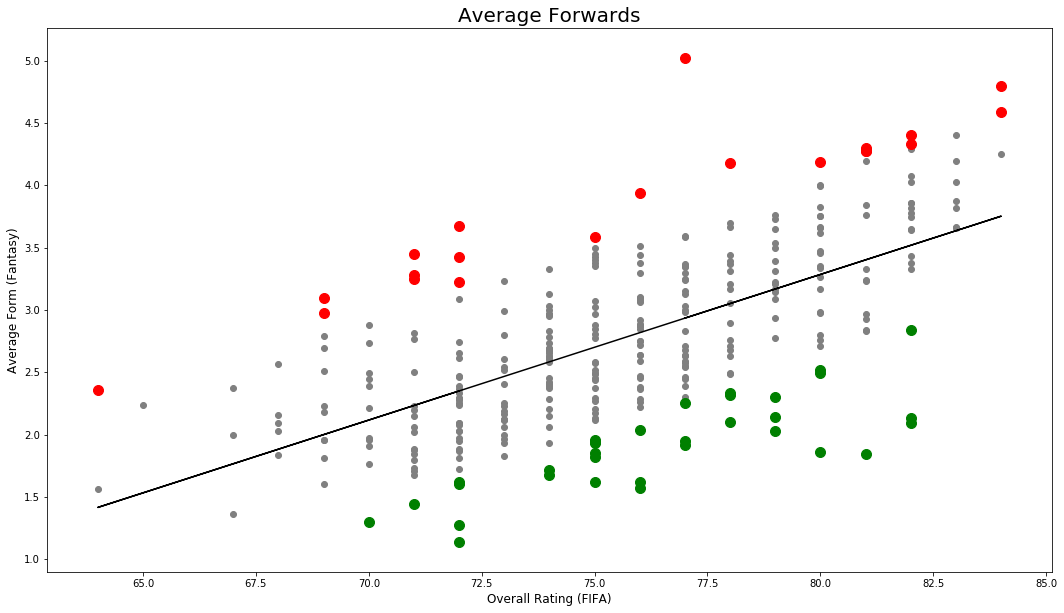

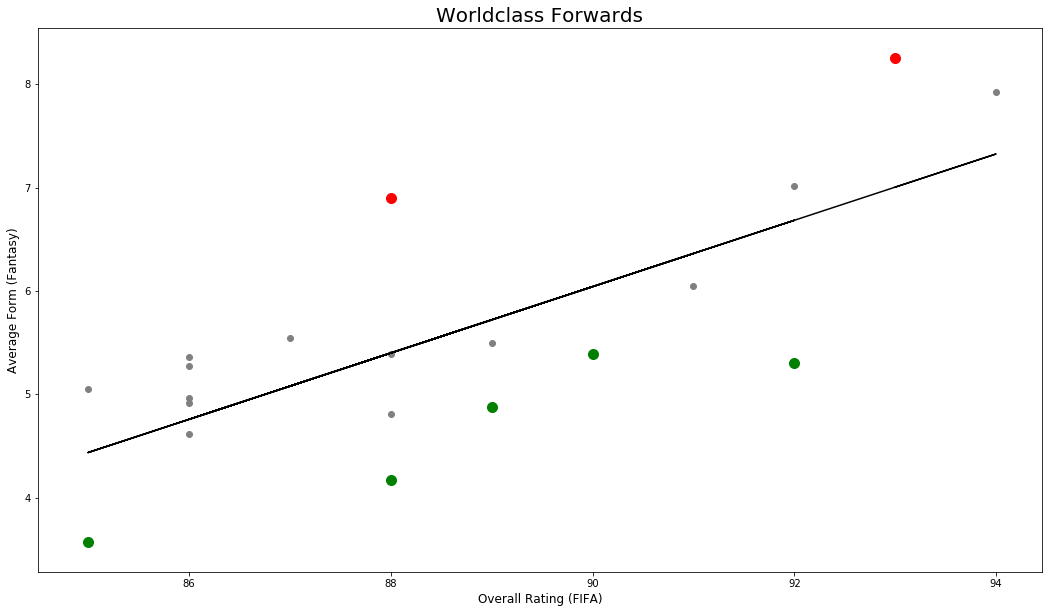

In [60]:
plt.figure(figsize=(18,10))
plt.scatter(w, z,color='grey') 
plt.scatter(t1, t2,color='red',s=100) 
plt.scatter(t3, t4,color='green',s=100) 
plt.plot(w, average_forwards_model.predict(w),color='k') 
plt.title('Average Forwards', fontsize=20)
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/Average Forwards.png')
plt.show() 

plt.figure(figsize=(18,10)) 
plt.scatter(x, y,color='grey') 
plt.scatter(s1, s2,color='red',s=100) 
plt.scatter(s3, s4,color='green',s=100) 
plt.plot(x, worldclass_forwards_model.predict(x),color='k') 
plt.title('Worldclass Forwards', fontsize=20) 
plt.xlabel("Overall Rating (FIFA)", fontsize=12)
plt.ylabel("Average Form (Fantasy)", fontsize=12)
plt.savefig('../../data/analysis/World Class Forwards.png')
plt.show()


## Which is more accurate at predicting real-life form: Underrated Players

In [61]:
underrated_players = pd.concat([underrated_goalkeepers,underrated_defenders,underrated_midfielders,underrated_forwards], axis=0).reset_index().drop('index',1)

In [62]:
underrated_players = underrated_players[underrated_players['Apps This Season']>0]

In [63]:
underrated_players['FIFA Rating Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Predicted Form'])
underrated_players['Previous Form Distance'] = abs(underrated_players['Current Average Form'] - underrated_players['Previous Average Form'])
underrated_players['Difference'] = abs(underrated_players['FIFA Rating Distance'] - underrated_players['Previous Form Distance'])

In [64]:
underrated_players.loc[underrated_players['FIFA Rating Distance']<underrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
underrated_players.loc[underrated_players['FIFA Rating Distance']>underrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
underrated_players.loc[underrated_players['FIFA Rating Distance'] == underrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [65]:
x = underrated_players.Verdict.value_counts()
x = x.transpose()
x.columns = ['Pevious Form', 'FIFA Rating', 'Equal']
x = x.transpose()

Text(0.5,1,'Underrated Verdict')

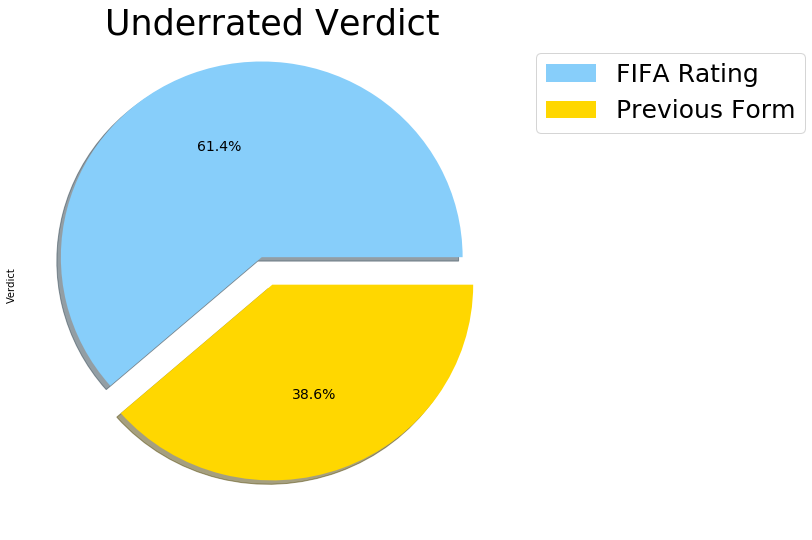

In [66]:
explode = (0.15, 0)
labels = ['','']
x.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['lightskyblue','gold'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=x.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Underrated Verdict',fontsize=35,color='Black')

In [67]:
underrated_players = underrated_players[underrated_players['Verdict']=='Previous Form']
underrated_players = underrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [68]:
underrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/18/players/188350.png,True,False,...,31.000000,4.806452,8.0,4.875000,1.540520,3.265931,1.609069,0.068548,1.540520,Previous Form
1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/18/players/189446.png,False,False,...,21.000000,3.476190,19.0,3.473684,1.359537,2.116653,1.357031,0.002506,1.354525,Previous Form
2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/18/players/201942.png,False,False,...,41.250000,3.890909,34.0,4.647059,1.156426,2.734483,1.912576,0.756150,1.156426,Previous Form
3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/18/players/208722.png,False,False,...,31.333333,3.936170,27.0,4.370370,1.139904,2.796266,1.574105,0.434200,1.139904,Previous Form
4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/18/players/220814.png,False,False,...,8.666667,3.576923,23.0,4.304348,1.136721,2.440202,1.864146,0.727425,1.136721,Previous Form
5,James Rodriguez,Midfielder,FC Bayern Munich,German Bundesliga,25,Colombia,86,https://cdn.sofifa.org/18/players/198710.png,False,False,...,28.000000,4.357143,21.0,4.428571,1.091212,3.265931,1.162640,0.071429,1.091212,Previous Form
6,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/18/players/201399.png,False,False,...,38.750000,4.793548,29.0,6.448276,1.041475,3.752074,2.696202,1.654727,1.041475,Previous Form
7,Anthony Martial,Midfielder,Manchester United,English Premier League,21,France,82,https://cdn.sofifa.org/18/players/211300.png,False,False,...,29.500000,3.593220,28.0,3.714286,0.920520,2.672700,1.041586,0.121065,0.920520,Previous Form
8,Adem Ljajic,Midfielder,Torino,Italian Serie A,25,Serbia,79,https://cdn.sofifa.org/18/players/190544.png,False,False,...,36.500000,3.404110,23.0,3.869565,0.916759,2.487351,1.382214,0.465456,0.916759,Previous Form
9,Alejandro Dario Gomez,Midfielder,Atalanta,Italian Serie A,29,Argentina,84,https://cdn.sofifa.org/18/players/143076.png,False,False,...,43.666667,3.717557,28.0,3.714286,0.921292,2.796266,0.918020,0.003272,0.914748,Previous Form


## Which is more accurate at predicting real-life form: Overerrated Players

In [69]:
overrated_players = pd.concat([overrated_goalkeepers,overrated_defenders,overrated_midfielders,overrated_forwards], axis=0).reset_index().drop('index',1)

In [70]:
overrated_players = overrated_players[overrated_players['Apps This Season']>0]

In [71]:
overrated_players['FIFA Rating Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Predicted Form'])
overrated_players['Previous Form Distance'] = abs(overrated_players['Current Average Form'] - overrated_players['Previous Average Form'])
overrated_players['Difference'] = abs(overrated_players['FIFA Rating Distance'] - overrated_players['Previous Form Distance'])

In [72]:
overrated_players.loc[overrated_players['FIFA Rating Distance']<overrated_players['Previous Form Distance'],'Verdict'] = 'FIFA Rating'
overrated_players.loc[overrated_players['FIFA Rating Distance']>overrated_players['Previous Form Distance'],'Verdict'] = 'Previous Form'
overrated_players.loc[overrated_players['FIFA Rating Distance'] == overrated_players['Previous Form Distance'],'Verdict'] = 'Equal'

In [73]:
y = overrated_players.Verdict.value_counts()
y = y.transpose()
y.columns = ['Pevious Form', 'FIFA Rating','Equal']
y = y.transpose()

Text(0.5,1,'Overrated Verdict')

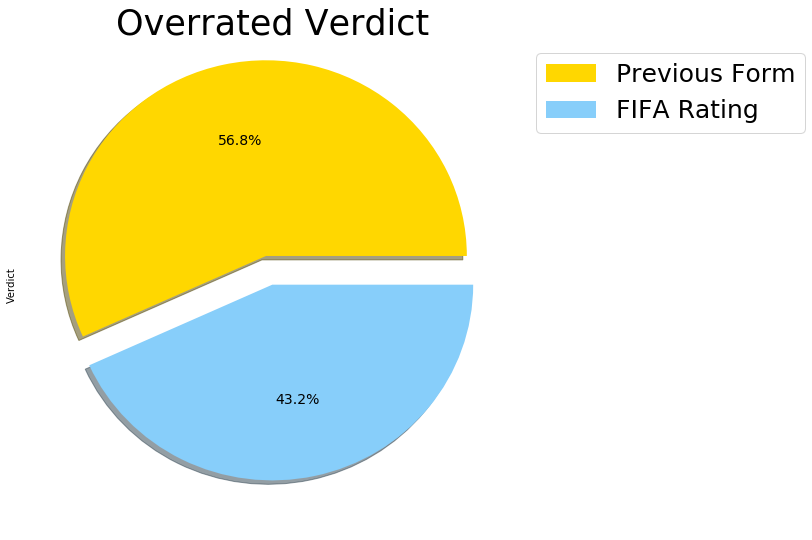

In [74]:
explode = (0.15, 0)
labels = ['','']
y.plot(subplots=True,kind='pie',figsize=(9,9),fontsize=14,explode=explode,autopct='%1.1f%%',shadow=True,labels=labels,colors=['gold','lightskyblue'],labeldistance=1.4)
plt.legend(bbox_to_anchor=(1, 1, 0, 0),prop={'size':25},labels=y.index)
plt.gca().set_title('',color='white',fontsize=30)
plt.title('Overrated Verdict',fontsize=35,color='Black')

In [75]:
overrated_players = overrated_players[overrated_players['Verdict']=='Previous Form']
overrated_players = overrated_players.sort_values('Difference', ascending=False).reset_index().drop('index',1)

In [76]:
overrated_players.head(10)

,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,fan's_favourite_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,Manu Trigueros,Forward,Villarreal CF,Spanish Primera Division,25,Spain,82,https://cdn.sofifa.org/18/players/206545.png,False,False,...,34.250000,2.094891,30.0,2.166667,-1.423461,3.518352,1.351685,0.071776,1.279909,Previous Form
1,N'Golo Kante,Midfielder,Chelsea,English Premier League,26,France,87,https://cdn.sofifa.org/18/players/215914.png,False,False,...,36.333333,2.284404,30.0,2.166667,-1.205328,3.489731,1.323065,0.117737,1.205328,Previous Form
2,Luka Modric,Midfielder,Real Madrid CF,Spanish Primera Division,31,Croatia,89,https://cdn.sofifa.org/18/players/177003.png,False,False,...,35.000000,2.400000,23.0,2.608696,-1.537332,3.937332,1.328636,0.208696,1.119941,Previous Form
3,Erik Moran,Forward,CD Leganes,Spanish Primera Division,26,Spain,72,https://cdn.sofifa.org/18/players/201991.png,False,False,...,9.666667,1.275862,6.0,1.000000,-1.073880,2.349742,1.349742,0.275862,1.073880,Previous Form
4,Jorge Mere,Defender,1. FC Koln,German Bundesliga,20,Spain,78,https://cdn.sofifa.org/18/players/223033.png,False,False,...,28.000000,1.339286,19.0,1.421053,-1.182865,2.522151,1.101098,0.081767,1.019332,Previous Form
5,Muhamed Besic,Midfielder,Everton,English Premier League,24,Bosnia Herzegovina,76,https://cdn.sofifa.org/18/players/200765.png,True,False,...,17.500000,1.371429,2.0,1.000000,-0.930574,2.302002,1.302002,0.371429,0.930574,Previous Form
6,Nordin Amrabat,Forward,CD Leganes,Spanish Primera Division,30,Morocco,79,https://cdn.sofifa.org/18/players/183108.png,False,False,...,25.000000,2.300000,30.0,1.944444,-0.867769,3.167769,1.223324,0.355556,0.867769,Previous Form
7,Tobias Strobl,Defender,Borussia Monchengladbach,German Bundesliga,27,Germany,76,https://cdn.sofifa.org/18/players/207894.png,False,False,...,27.250000,1.513761,2.0,0.000000,-0.844491,2.358253,2.358253,1.513761,0.844491,Previous Form
8,Alexis Sanchez,Forward,Arsenal,English Premier League,28,Chile,89,https://cdn.sofifa.org/18/players/184941.png,False,False,...,41.500000,4.879518,28.0,3.928571,-0.841256,5.720774,1.792202,0.950947,0.841256,Previous Form
9,Dani Garcia,Midfielder,SD Eibar,Spanish Primera Division,27,Spain,81,https://cdn.sofifa.org/18/players/216194.png,False,False,...,34.666667,1.788462,28.0,1.607143,-0.822455,2.610917,1.003774,0.181319,0.822455,Previous Form


## Reasons for players being over/underrated 

In [77]:
age = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
age.set_value('Average Age','All Players',RQ1.mean()['age'])
age.set_value('Average Age','Underrated Players',underrated_players.mean()['age'])
age.set_value('Average Age','Overrated Players',overrated_players.mean()['age'])

,All Players,Underrated Players,Overrated Players
Average Age,27.914,26.0909,26.0714


In [78]:
age = pd.DataFrame(columns = ["All Players","Underrated Players", "Overrated Players"])
age.set_value('Average Apps/Season','All Players',RQ1.mean()['Average Apps/Season'])
age.set_value('Average Apps/Season','Underrated Players',underrated_players.mean()['Average Apps/Season'])
age.set_value('Average Apps/Season','Overrated Players',overrated_players.mean()['Average Apps/Season'])
age.set_value('Apps This Season','All Players',RQ1.mean()['Apps This Season'])
age.set_value('Apps This Season','Underrated Players',underrated_players.mean()['Apps This Season'])
age.set_value('Apps This Season','Overrated Players',overrated_players.mean()['Apps This Season'])

,All Players,Underrated Players,Overrated Players
Average Apps/Season,29.0289,28.5947,30.9067
Apps This Season,11.311,23.1818,20.9524


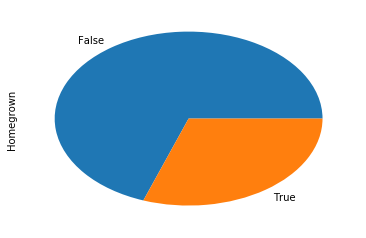

In [79]:
RQ1['Homegrown'].value_counts().plot(kind='pie')

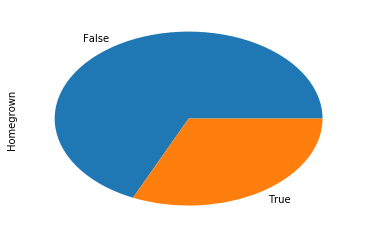

In [80]:
underrated_players['Homegrown'].value_counts().plot(kind='pie')

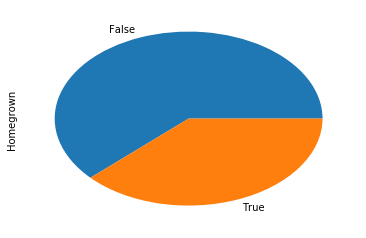

In [81]:
overrated_players['Homegrown'].value_counts().plot(kind='pie')

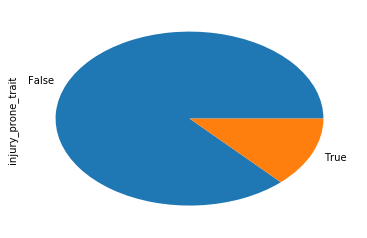

In [82]:
RQ1['injury_prone_trait'].value_counts().plot(kind='pie')

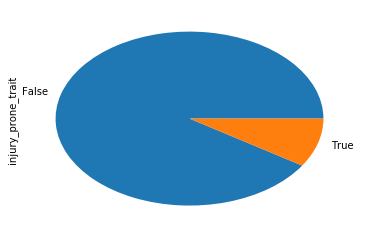

In [83]:
underrated_players['injury_prone_trait'].value_counts().plot(kind='pie')

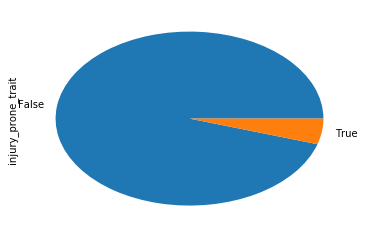

In [84]:
overrated_players['injury_prone_trait'].value_counts().plot(kind='pie')

# XI


In [85]:
underrated_goalkeepers = underrated_players[underrated_players['Position']=='Goalkeeper']
underrated_defenders = underrated_players[underrated_players['Position']=='Defender']
underrated_midfielders = underrated_players[underrated_players['Position']=='Midfielder']
underrated_forwards = underrated_players[underrated_players['Position']=='Forward']

In [86]:
underrated_goalkeepers = underrated_goalkeepers.sort_values('Difference',ascending=False)
underrated_goalkeeper = underrated_goalkeepers.head(1)

underrated_defenders = underrated_defenders.sort_values('Difference',ascending=False)
underrated_defender = underrated_defenders.head(4)


underrated_midfielders = underrated_midfielders.sort_values('Difference',ascending=False)
underrated_midfielder = underrated_midfielders.head(4)


underrated_forwards = underrated_forwards.sort_values('Difference',ascending=False)
underrated_forward = underrated_forwards.head(2)

underrated_XI= pd.concat([underrated_goalkeeper,underrated_defender,underrated_midfielder,underrated_forward])

In [87]:
underrated_XI['photo'] = underrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
underrated_XI = underrated_XI.reset_index()
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].round(2)
underrated_XI['Predicted Form'] = underrated_XI['Predicted Form'].astype(str)
Squad_Rating = underrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [88]:
underrated_XI

,index,Players,Position,club,league,age,nationality,overall,photo,injury_prone_trait,...,Average Apps/Season,Previous Average Form,Apps This Season,Current Average Form,Distance,Predicted Form,FIFA Rating Distance,Previous Form Distance,Difference,Verdict
0,15,Jan Oblak,Goalkeeper,Atletico Madrid,Spanish Primera Division,24,Slovenia,88,https://cdn.sofifa.org/1x/18/players/200389.png,False,...,26.333333,4.215190,33.0,4.545455,0.754070,3.46,1.084335,0.330265,0.754070,Previous Form
1,4,Lucas Hernandez,Defender,Atletico Madrid,Spanish Primera Division,21,France,77,https://cdn.sofifa.org/1x/18/players/220814.png,False,...,8.666667,3.576923,23.0,4.304348,1.136721,2.44,1.864146,0.727425,1.136721,Previous Form
2,16,Jose Maria Gimenez,Defender,Atletico Madrid,Spanish Primera Division,22,Uruguay,83,https://cdn.sofifa.org/1x/18/players/216460.png,False,...,16.000000,3.843750,20.0,3.700000,0.911853,2.93,0.768103,0.143750,0.624353,Previous Form
3,19,Alex Sandro,Defender,Juventus,Italian Serie A,26,Brazil,86,https://cdn.sofifa.org/1x/18/players/191043.png,False,...,24.500000,4.265306,22.0,5.090909,0.574549,3.69,1.400152,0.825603,0.574549,Previous Form
4,0,Marco Reus,Midfielder,Borussia Dortmund,German Bundesliga,28,Germany,86,https://cdn.sofifa.org/1x/18/players/188350.png,True,...,31.000000,4.806452,8.0,4.875000,1.540520,3.27,1.609069,0.068548,1.540520,Previous Form
5,1,Junior Stanislas,Midfielder,Bournemouth,English Premier League,27,England,73,https://cdn.sofifa.org/1x/18/players/189446.png,False,...,21.000000,3.476190,19.0,3.473684,1.359537,2.12,1.357031,0.002506,1.354525,Previous Form
6,2,Roberto Firmino,Midfielder,Liverpool,English Premier League,25,Brazil,83,https://cdn.sofifa.org/1x/18/players/201942.png,False,...,41.250000,3.890909,34.0,4.647059,1.156426,2.73,1.912576,0.756150,1.156426,Previous Form
7,3,Sadio Mane,Midfielder,Liverpool,English Premier League,25,Senegal,84,https://cdn.sofifa.org/1x/18/players/208722.png,False,...,31.333333,3.936170,27.0,4.370370,1.139904,2.8,1.574105,0.434200,1.139904,Previous Form
8,6,Mauro Icardi,Forward,Inter,Italian Serie A,24,Argentina,84,https://cdn.sofifa.org/1x/18/players/201399.png,False,...,38.750000,4.793548,29.0,6.448276,1.041475,3.75,2.696202,1.654727,1.041475,Previous Form
9,13,Jamie Vardy,Forward,Leicester City,English Premier League,30,England,81,https://cdn.sofifa.org/1x/18/players/208830.png,False,...,35.000000,4.276190,33.0,4.515152,0.874700,3.4,1.113661,0.238961,0.874700,Previous Form


In [89]:
JoinedUnderratedImages = underrated_XI['photo'].as_matrix() 
GK1 = mpimg.imread(JoinedUnderratedImages [0]) 
DF1 = mpimg.imread(JoinedUnderratedImages [1]) 
DF2 = mpimg.imread(JoinedUnderratedImages [2]) 
DF3 = mpimg.imread(JoinedUnderratedImages [3]) 
QM = mpimg.imread('../../data/raw/blankface.png') 
MD1 = mpimg.imread(JoinedUnderratedImages [4]) 
MD2 = mpimg.imread(JoinedUnderratedImages [5]) 
MD3 = mpimg.imread(JoinedUnderratedImages [6]) 
MD4 = mpimg.imread(JoinedUnderratedImages [7]) 
FW1 = mpimg.imread(JoinedUnderratedImages [8]) 
FW2 = mpimg.imread(JoinedUnderratedImages [9])

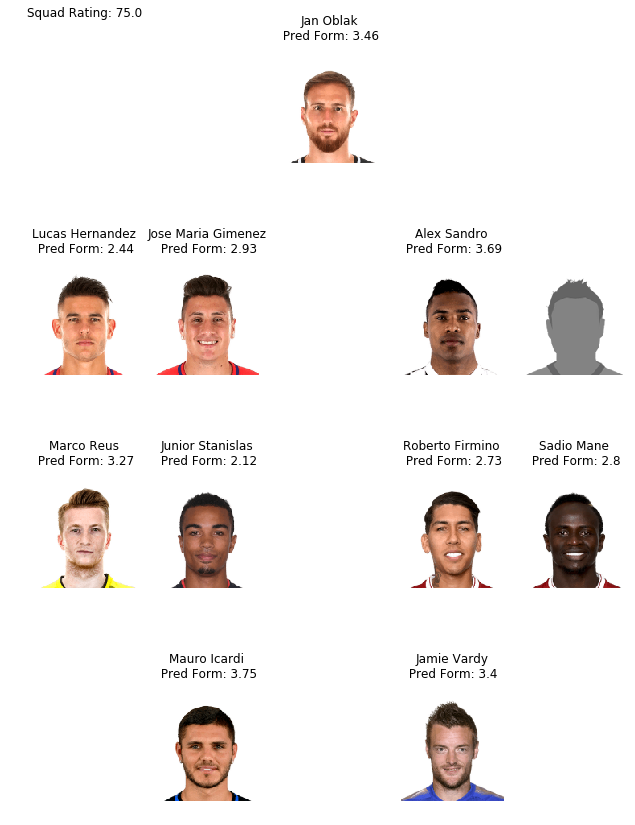

In [90]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(GK1)
axarr[0,4].set_title(underrated_XI['Players'].loc[0] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[0,4].axis('off')


axarr[1,2].imshow(DF1)
axarr[1,2].set_title(underrated_XI['Players'].loc[1] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[1] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(underrated_XI['Players'].loc[2] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[2] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(underrated_XI['Players'].loc[3] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[3] + '\n') 

axarr[1,5].axis('off')


axarr[1,6].imshow(QM)
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(underrated_XI['Players'].loc[4] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(underrated_XI['Players'].loc[5] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(underrated_XI['Players'].loc[6] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(underrated_XI['Players'].loc[7] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(underrated_XI['Players'].loc[8] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(underrated_XI['Players'].loc[9] + '\n' + ' Pred Form: ' + underrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,5].axis('off')


f.savefig('../../data/analysis/Underrated_XI.png')


In [91]:
overrated_goalkeepers = overrated_players[overrated_players['Position']=='Goalkeeper']
overrated_defenders = overrated_players[overrated_players['Position']=='Defender']
overrated_midfielders = overrated_players[overrated_players['Position']=='Midfielder']
overrated_forwards = overrated_players[overrated_players['Position']=='Forward']

In [110]:
overrated_goalkeepers = overrated_goalkeepers.sort_values('Difference',ascending=False)
overrated_goalkeeper = overrated_goalkeepers.head(1)

overrated_defenders = overrated_defenders.sort_values('Difference',ascending=False)
overrated_defender = overrated_defenders.head(4)


overrated_midfielders = overrated_midfielders.sort_values('Difference',ascending=False)
overrated_midfielder = overrated_midfielders.head(4)


overrated_forwards = overrated_forwards.sort_values('Difference',ascending=False)
overrated_forward = overrated_forwards.head(2)

overrated_XI= pd.concat([overrated_goalkeeper,overrated_defender,overrated_midfielder,overrated_forward])

In [111]:
overrated_XI['photo'] = overrated_XI['photo'].replace('/18/','/1x/18/', regex=True)
overrated_XI = overrated_XI.reset_index()
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].round(2)
overrated_XI['Predicted Form'] = overrated_XI['Predicted Form'].astype(str)
Squad_Rating = overrated_XI['overall'].sum()/11
Squad_Rating = str(Squad_Rating)

In [113]:
JoinedOverratedImages = overrated_XI['photo'].as_matrix()

QM = mpimg.imread('../../data/raw/blankface.png')
DF1 = mpimg.imread(JoinedOverratedImages [0])
DF2 = mpimg.imread(JoinedOverratedImages [1])
DF3 = mpimg.imread(JoinedOverratedImages [2])
DF4 = mpimg.imread(JoinedOverratedImages [3])
MD1 = mpimg.imread(JoinedOverratedImages [4])
MD2 = mpimg.imread(JoinedOverratedImages [5])
MD3 = mpimg.imread(JoinedOverratedImages [6])
MD4 = mpimg.imread(JoinedOverratedImages [7])
FW1 = mpimg.imread(JoinedOverratedImages [8])
FW2 = mpimg.imread(JoinedOverratedImages [9])

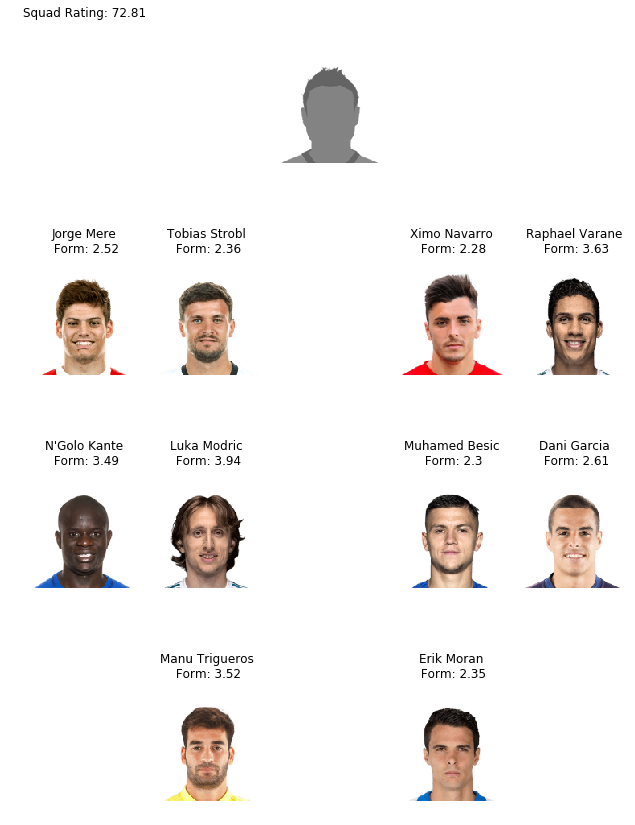

In [114]:
f, axarr = plt.subplots(4,7,figsize=(15,15))
fig = plt.figure()
axarr[0,0].set_visible(False)
axarr[0,1].set_visible(False)
axarr[0,3].set_visible(False)
axarr[0,5].set_visible(False)
axarr[0,6].set_visible(False)
axarr[1,0].set_visible(False)
axarr[1,1].set_visible(False)
axarr[1,4].set_visible(False)
axarr[2,0].set_visible(False)
axarr[2,1].set_visible(False)
axarr[2,4].set_visible(False)
axarr[3,0].set_visible(False)
axarr[3,1].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,6].set_visible(False)
axarr[3,4].set_visible(False)
axarr[3,2].set_visible(False)
axarr[3,6].set_visible(False)


axarr[0,2].set_title('Squad Rating: ' + Squad_Rating[:5])
axarr[0,2].axis('off')

axarr[0,4].imshow(QM)
axarr[0,4].axis('off')

axarr[1,2].imshow(DF1)
axarr[1,2].set_title(overrated_XI['Players'].loc[0] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[0] + '\n') 
axarr[1,2].axis('off')


axarr[1,3].imshow(DF2)
axarr[1,3].set_title(overrated_XI['Players'].loc[1] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[1] + '\n')
axarr[1,3].axis('off')


axarr[1,5].imshow(DF3)
axarr[1,5].set_title(overrated_XI['Players'].loc[2] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[2] + '\n') 

axarr[1,5].axis('off')


axarr[1,6].imshow(DF4)
axarr[1,6].set_title(overrated_XI['Players'].loc[3] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[3] + '\n') 
axarr[1,6].axis('off')


axarr[2,2].imshow(MD1)
axarr[2,2].set_title(overrated_XI['Players'].loc[4] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[4] + '\n') 

axarr[2,2].axis('off')


axarr[2,3].imshow(MD2)
axarr[2,3].set_title(overrated_XI['Players'].loc[5] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[5] + '\n') 
axarr[2,3].axis('off')


axarr[2,5].imshow(MD3)
axarr[2,5].set_title(overrated_XI['Players'].loc[6] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[6] + '\n') 
axarr[2,5].axis('off')


axarr[2,6].imshow(MD4)
axarr[2,6].set_title(overrated_XI['Players'].loc[7] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[7] + '\n') 
axarr[2,6].axis('off')


axarr[3,3].imshow(FW1)
axarr[3,3].set_title(overrated_XI['Players'].loc[8] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[8] + '\n') 
axarr[3,3].axis('off')

axarr[3,5].imshow(FW2)
axarr[3,5].set_title(overrated_XI['Players'].loc[9] + '\n' + ' Form: ' + overrated_XI['Predicted Form'].loc[9] + '\n') 
axarr[3,5].axis('off')



f.savefig('../../data/analysis/Overrated_XI.png')